In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
youtube_filepath = "Global YouTube Statistics.csv"


encodings_to_try = ['utf-8', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        youtube_data = pd.read_csv(youtube_filepath, encoding=encoding)
        print("Successfuly read the file with encoding: " + encoding)
        break
    except UnicodeDecodeError:
        print("Failed to read the file with: " + encoding)


Failed to read the file with: utf-8
Successfuly read the file with encoding: latin-1


In [3]:
youtube_data = pd.read_csv(youtube_filepath, encoding="latin-1")
youtube_data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
print(youtube_data.dtypes)
print(youtube_data.shape)

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [5]:
youtube_data.select_dtypes(["object"]).nunique()

Youtuber         995
category          18
Title            992
Country           49
Abbreviation      49
channel_type      14
created_month     12
dtype: int64

c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


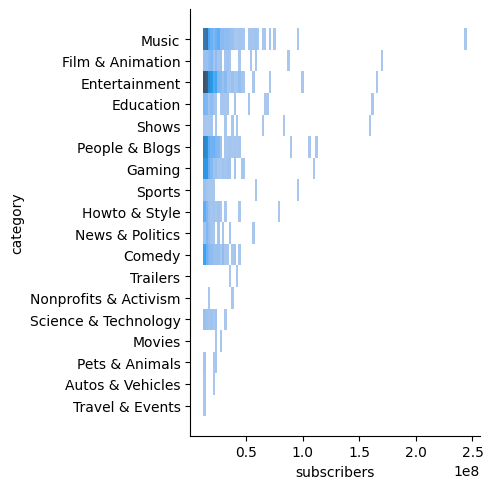

In [6]:
sns.displot(
    data=youtube_data,
    y = "category", x = "subscribers"
)

c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

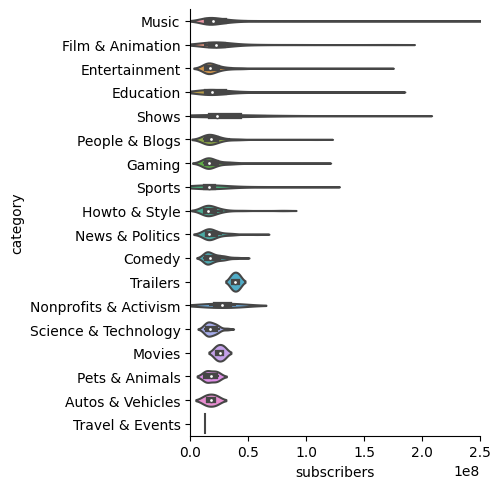

In [7]:
plt.figure(figsize=(12, 8))
sns.catplot(data=youtube_data, y="category", x="subscribers", kind="violin")
# plt.xticks(rotation=90)
plt.xlim(0, 250000000)
plt.show()

In [8]:
youtube_data["mean_yearly_earnings_by_category"] = youtube_data.groupby("category")["highest_yearly_earnings"].transform("mean")
unique = youtube_data.drop_duplicates(subset="category")
unique['mean_yearly_earnings_by_category'] = unique['mean_yearly_earnings_by_category'].apply(lambda x: f'{x:.2f}' if not pd.isnull(x) else 'N/A')

unique = unique[~unique["category"].isnull()]
print(unique[["category", "mean_yearly_earnings_by_category"]])

                  category mean_yearly_earnings_by_category
0                    Music                       6643245.00
1         Film & Animation                       8797580.36
2            Entertainment                       7483962.14
3                Education                       8324391.13
4                    Shows                      24384615.38
6           People & Blogs                       6558865.92
7                   Gaming                       3252386.36
11                  Sports                       9615118.18
16           Howto & Style                       2316467.60
33         News & Politics                       7707752.66
59                  Comedy                       8038623.19
70                Trailers                       4350000.00
84   Nonprofits & Activism                       4700000.00
143   Science & Technology                       2415471.71
182                 Movies                       5450000.00
275         Pets & Animals              

C:\Users\Userpc\AppData\Local\Temp\ipykernel_13200\2457189934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['mean_yearly_earnings_by_category'] = unique['mean_yearly_earnings_by_category'].apply(lambda x: f'{x:.2f}' if not pd.isnull(x) else 'N/A')


<Axes: xlabel='mean_yearly_earnings_by_category', ylabel='category'>

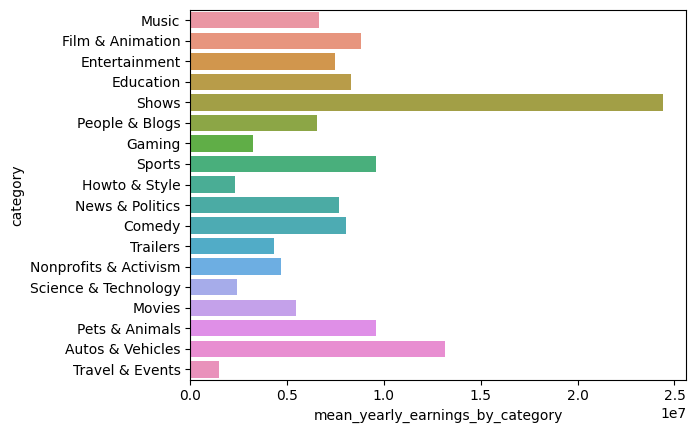

In [9]:
unique["mean_yearly_earnings_by_category"]=unique["mean_yearly_earnings_by_category"].astype('float')
# unique["mean_yearly_earnings_by_category"].dtype
sns.barplot(data=unique, x = "mean_yearly_earnings_by_category", y="category")

In [10]:
print(youtube_data.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'mean_yearly_earnings_by_category'],
      dtype='object')


<Axes: xlabel='views_per_upload', ylabel='mean_yearly_earnings_by_category'>

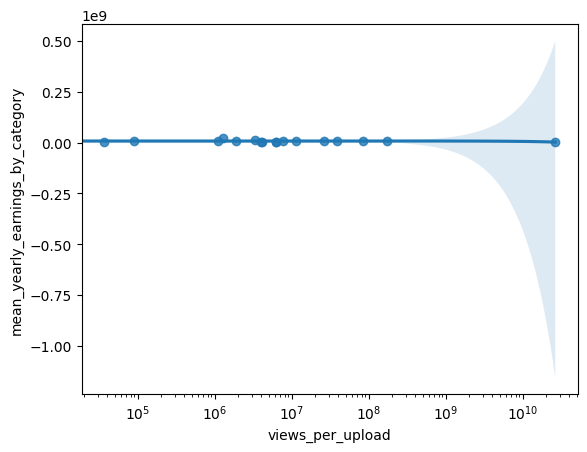

In [17]:
youtube_data["views_per_upload"] = youtube_data["video views"] / youtube_data["uploads"]
youtube_data["mean_yearly_earnings_by_category"] = unique["mean_yearly_earnings_by_category"]
plt.xscale("log")
sns.regplot(x="views_per_upload", y="mean_yearly_earnings_by_category", data = youtube_data)